<a href="https://colab.research.google.com/github/Sid3839/Laptop-Price-Analysis-and-Prediction/blob/main/Laptop_Price_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Laptop Price Analysis & Prediction

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Step 2: Load Dataset
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("laptop_prices.csv")

Saving laptop_prices.csv to laptop_prices.csv


In [ ]:
# Step 3: Basic Info
print(df.shape)
print(df.info())
print(df.head())

(1275, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq  

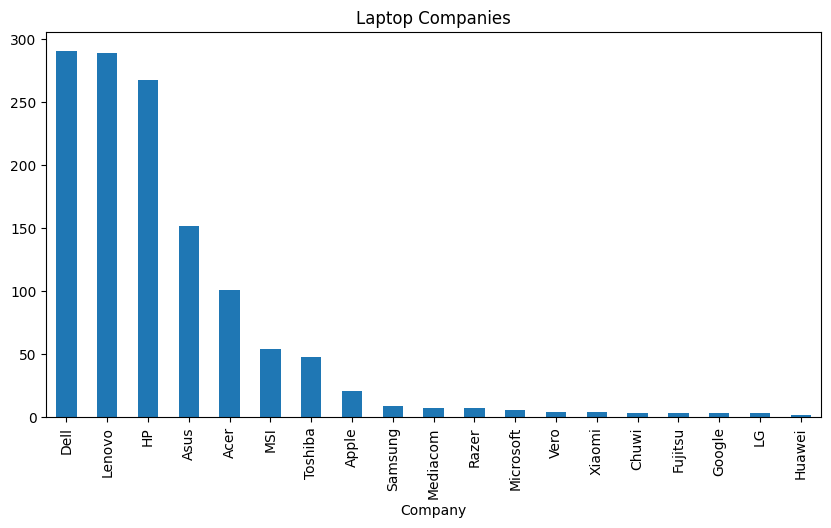

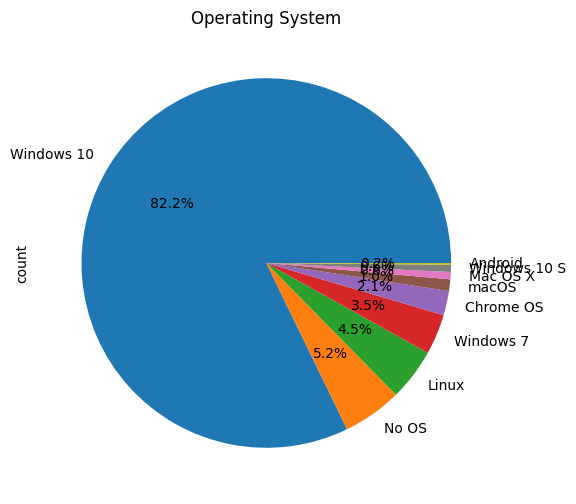

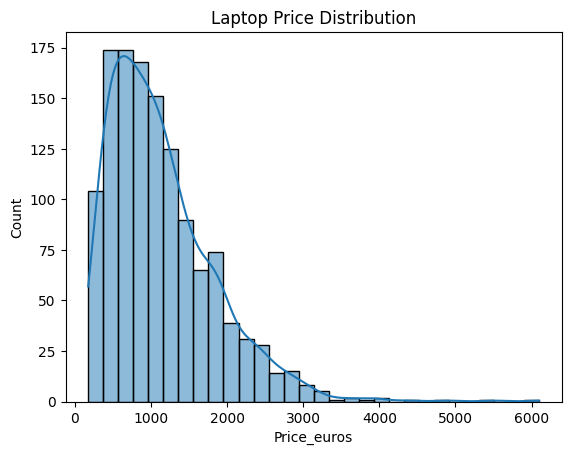

In [ ]:
# Step 4: EDA (Exploratory Data Analysis)
plt.figure(figsize=(10,5))
df['Company'].value_counts().plot(kind='bar', title="Laptop Companies")
plt.show()

plt.figure(figsize=(6,6))
df['OS'].value_counts().plot(kind='pie', autopct="%.1f%%", title="Operating System")
plt.show()

sns.histplot(df['Price_euros'], bins=30, kde=True)
plt.title("Laptop Price Distribution")
plt.show()

In [ ]:
# Step 5: Data Preprocessing
# Handle missing values
df = df.dropna()

# Convert categorical data into numerical
categorical_cols = ['Company','Product','TypeName','OS','Screen','Touchscreen',
                    'IPSpanel','RetinaDisplay','CPU_company','CPU_model',
                    'PrimaryStorageType','SecondaryStorageType',
                    'GPU_company','GPU_model']

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Features and Target
X = df.drop('Price_euros', axis=1)
y = df['Price_euros']

In [ ]:

# Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
# Step 7: Models Training
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# XGBoost
# Clean up column names
X_train.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in X_train.columns]
X_test.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in X_test.columns]

xgb = XGBRegressor(n_estimators=300, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

In [ ]:
# Step 8: Evaluation Function
def evaluate_model(y_test, y_pred, model_name):
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} Performance:")
    print(f"   MSE: {mse:.2f}")
    print(f"   RMSE: {np.sqrt(mse):.2f}")
    print(f"   R2 Score: {r2:.4f}")
    print("-"*40)

# Evaluate all models
evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_xgb, "XGBoost")

Linear Regression Performance:
   MSE: 3935205.02
   RMSE: 1983.74
   R2 Score: -6.9285
----------------------------------------
Random Forest Performance:
   MSE: 64599.40
   RMSE: 254.16
   R2 Score: 0.8698
----------------------------------------
XGBoost Performance:
   MSE: 51539.37
   RMSE: 227.02
   R2 Score: 0.8962
----------------------------------------


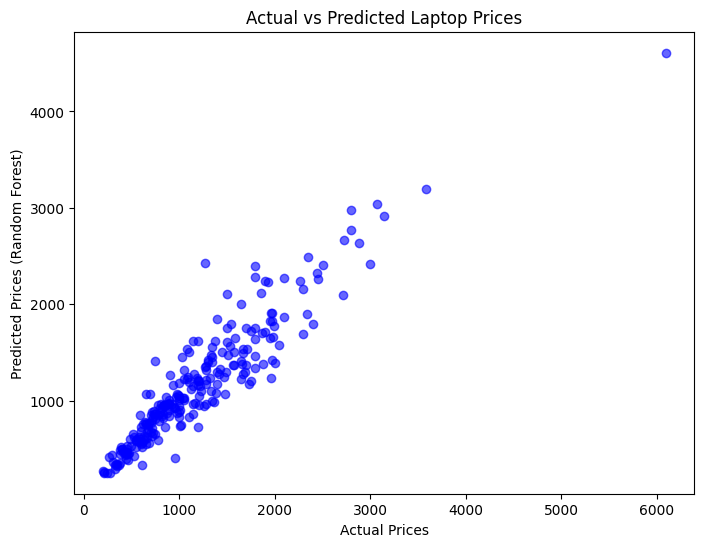

In [ ]:
# Step 9: Visualization of Predictions
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rf, alpha=0.6, color="blue")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices (Random Forest)")
plt.title("Actual vs Predicted Laptop Prices")
plt.show()